<a href="https://colab.research.google.com/github/FreeMagic200/paga_umap/blob/main/04_paga_umap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# build a paga based umap

In [ ]:
import scanpy as sc
import umap.umap_ as umap
import fa2
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
adata = sc.read_h5ad('./12_subclustered_anndata.h5ad')

In [ ]:
print(sc.__version__)

1.10.2


In [ ]:
adata.obsm_keys

<bound method AnnData.obsm_keys of AnnData object with n_obs × n_vars = 111250 × 55771
    obs: 'nCount_RNA', 'nFeature_RNA', 'Batch', 'percent.mt', 'percent.ribo', 'percent.hb', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.8', 'seurat_clusters', 'pANN_0.25_0.08_228', 'pANN_0.25_0.12_230', 'pANN_0.25_0.18_464', 'pANN_0.25_0.22_813', 'pANN_0.25_0.26_822', 'pANN_0.25_0.3_577', 'pANN_0.25_0.24_485', 'pANN_0.25_0.005_532', 'pANN_0.25_0.15_535', 'pANN_0.25_0.23_459', 'pANN_0.25_0.27_588', 'res2.4.rpca.clust', 'class.clust', 'stage', 'class_id_annotation', 'class_id', 'class_annotation', 'subclass_annotation', 'cell_id', 'cluster_annotation'
    var: 'names'
    obsm: 'X_cca.umap', 'X_harmony.umap', 'X_integrated.cca', 'X_integrated.harmony', 'X_integrated.jointpca', 'X_integrated.mnn', 'X_integrated.rpca', 'X_jointpca.umap', 'X_mnn.umap', 'X_pca', 'X_rpca.umap', 'X_umap'
    layers: 'counts_RNA'>

In [ ]:
adata.obsm['X_umap'] = adata.obsm['X_rpca.umap']

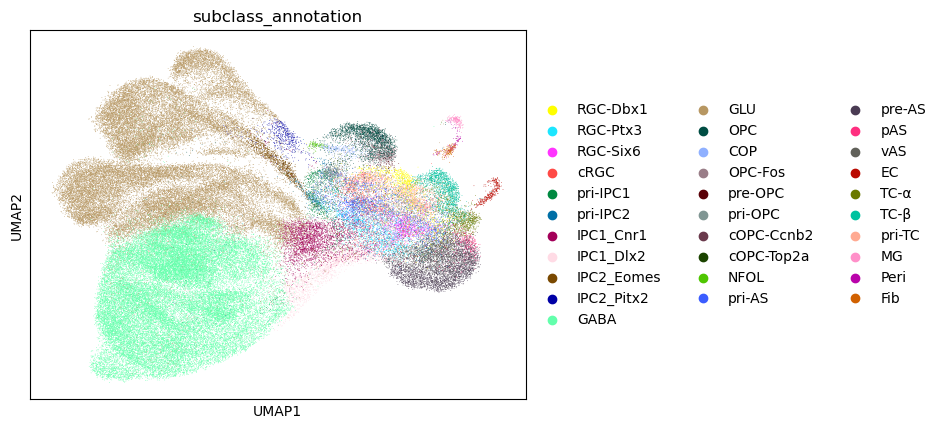

In [ ]:
sc.pl.umap(adata,
         color='subclass_annotation' # 仅指定 color 参数
         )

In [ ]:
print(adata)

AnnData object with n_obs × n_vars = 111250 × 55771
    obs: 'nCount_RNA', 'nFeature_RNA', 'Batch', 'percent.mt', 'percent.ribo', 'percent.hb', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.8', 'seurat_clusters', 'pANN_0.25_0.08_228', 'pANN_0.25_0.12_230', 'pANN_0.25_0.18_464', 'pANN_0.25_0.22_813', 'pANN_0.25_0.26_822', 'pANN_0.25_0.3_577', 'pANN_0.25_0.24_485', 'pANN_0.25_0.005_532', 'pANN_0.25_0.15_535', 'pANN_0.25_0.23_459', 'pANN_0.25_0.27_588', 'res2.4.rpca.clust', 'class.clust', 'stage', 'class_id_annotation', 'class_id', 'class_annotation', 'subclass_annotation', 'cell_id', 'cluster_annotation'
    var: 'names'
    uns: 'subclass_annotation_colors'
    obsm: 'X_cca.umap', 'X_harmony.umap', 'X_integrated.cca', 'X_integrated.harmony', 'X_integrated.jointpca', 'X_integrated.mnn', 'X_integrated.rpca', 'X_jointpca.umap', 'X_mnn.umap', 'X_pca', 'X_rpca.umap', 'X_umap'
    layers: 'counts_RNA'


In [ ]:
adata.y

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=16,use_rep='X_integrated.rpca')

In [ ]:
sc.tl.paga(adata, groups='subclass_annotation')

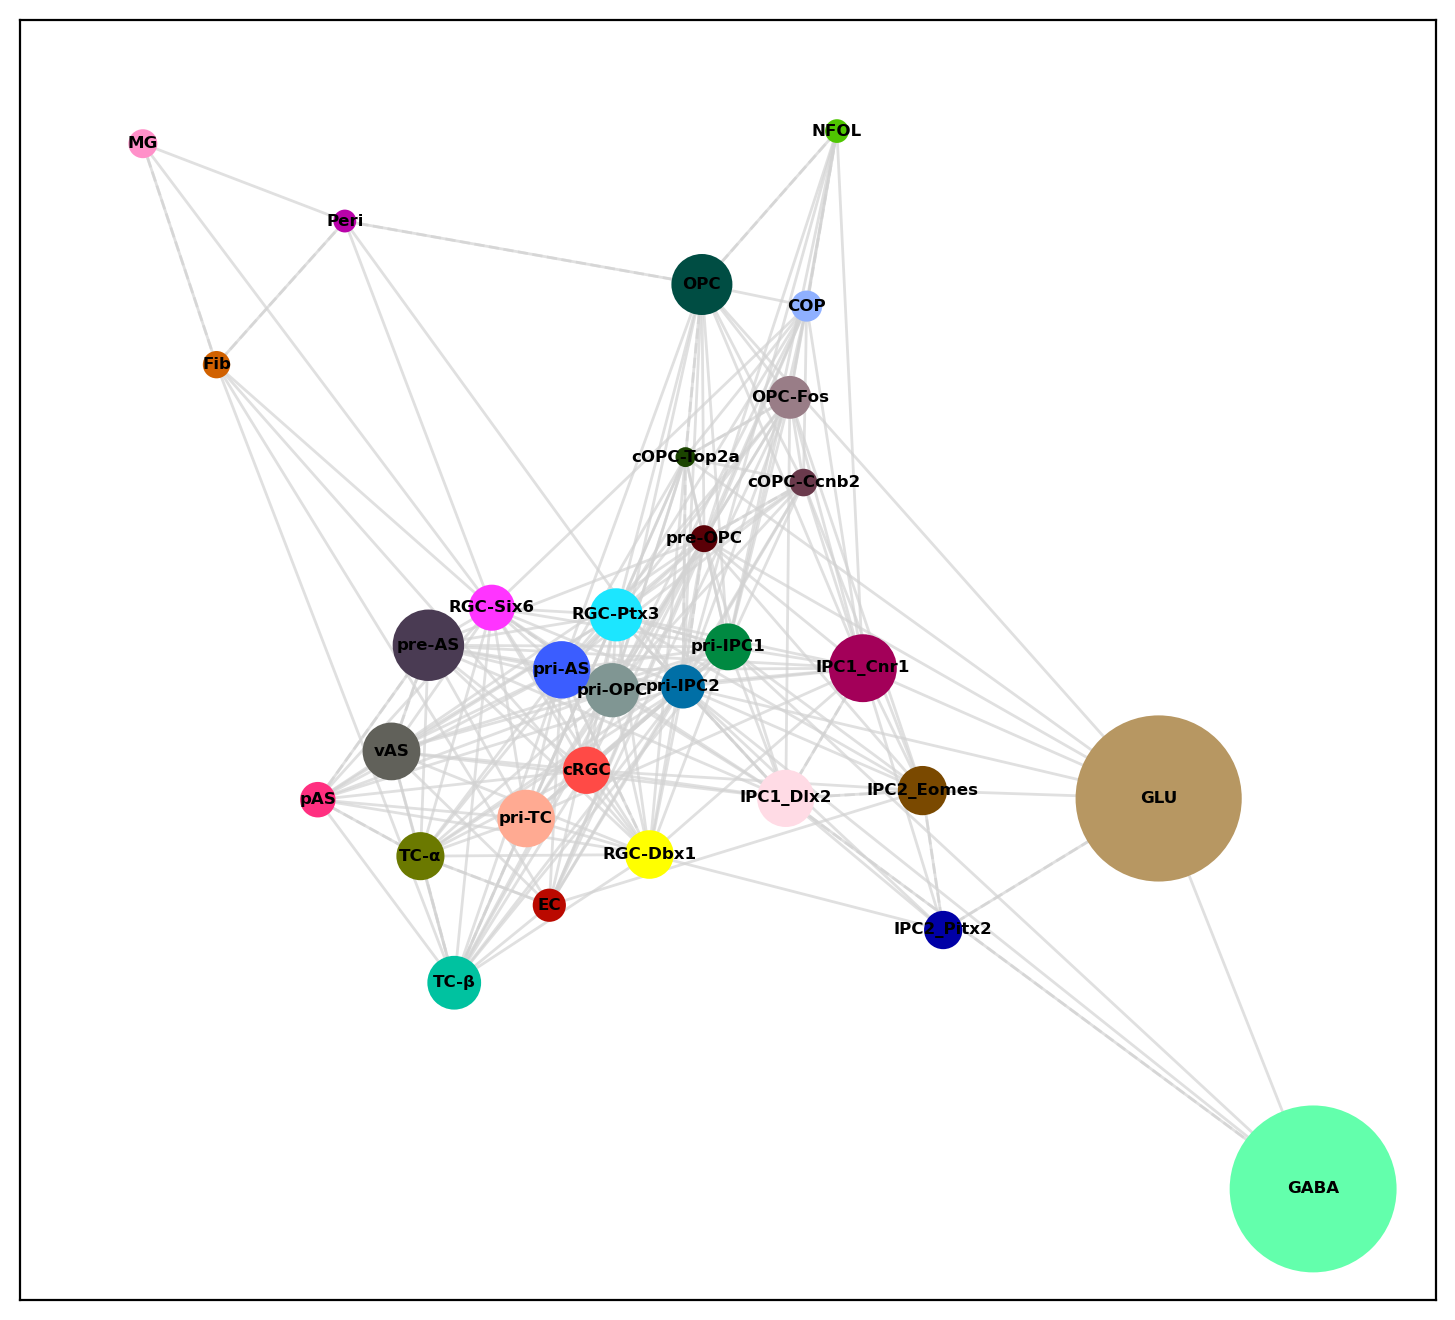

In [ ]:
# Set figure size (similar to R's options)
plt.rcParams['figure.figsize'] = (8, 8)  # width, height in inches
plt.rcParams['figure.dpi'] = 200       # resolution in dots per inch
# Plot PAGA with aesthetic adjustments - FIXED VERSION
# Plot PAGA with aesthetic adjustments - FIXED VERSION
sc.pl.paga(adata,
           color='subclass_annotation',
           node_size_scale=2,            # Increase node size
           node_size_power=0.7,          # Adjust node size scaling
           fontsize=6,                  # Increase font size for node labels
           # Keep only one fontweight specification - in this case using text_kwds
           # and completely omitting the fontweight parameter
           text_kwds={'color': 'black'},  # Only specify text color here
           solid_edges="connectivities",          # Connectivities for solid edges
           dashed_edges="connectivities_tree",    # Connectivities_tree for dashed edges
           threshold=0.03,               # Threshold for displaying edges
           show=False                    # Don't show plot immediately
          )

# Access the Matplotlib axes object
ax = plt.gca()

# Modify edges by accessing the collections in the axes
for collection in ax.collections:
    # Check if this collection represents edges (typically line collections)
    if hasattr(collection, 'get_segments') and len(collection.get_segments()) > 0:
        collection.set_color('lightgray')
        collection.set_alpha(0.7)
        collection.set_linewidth(1)


plt.show()  # Now show the plot with the modified edges

In [ ]:
# # Run umap-learn directly
# reducer = umap.UMAP(
#     n_components=16,  # dims = 1:16
#     n_neighbors=30,   # n.neighbors = 30
#     spread=0.37,       # spread = 0.37
#     min_dist=0.37,      # min.dist = 0.37
#     metric='correlation', # metric = "correlation"
#     init=init_coords    # Initialize with PAGA positions
# ).fit(adata.obsm['X_integrated.rpca'])

In [ ]:
# Run UMAP with PAGA initialization
sc.tl.umap(adata,
           n_components=16,  # dims = 1:16
           spread=0.37,       # spread = 0.37
           min_dist=0.37,      # min.dist = 0.37
          #  metric='correlation', # metric = "correlation"
           init_pos='paga')   # Initialize with PAGA positions

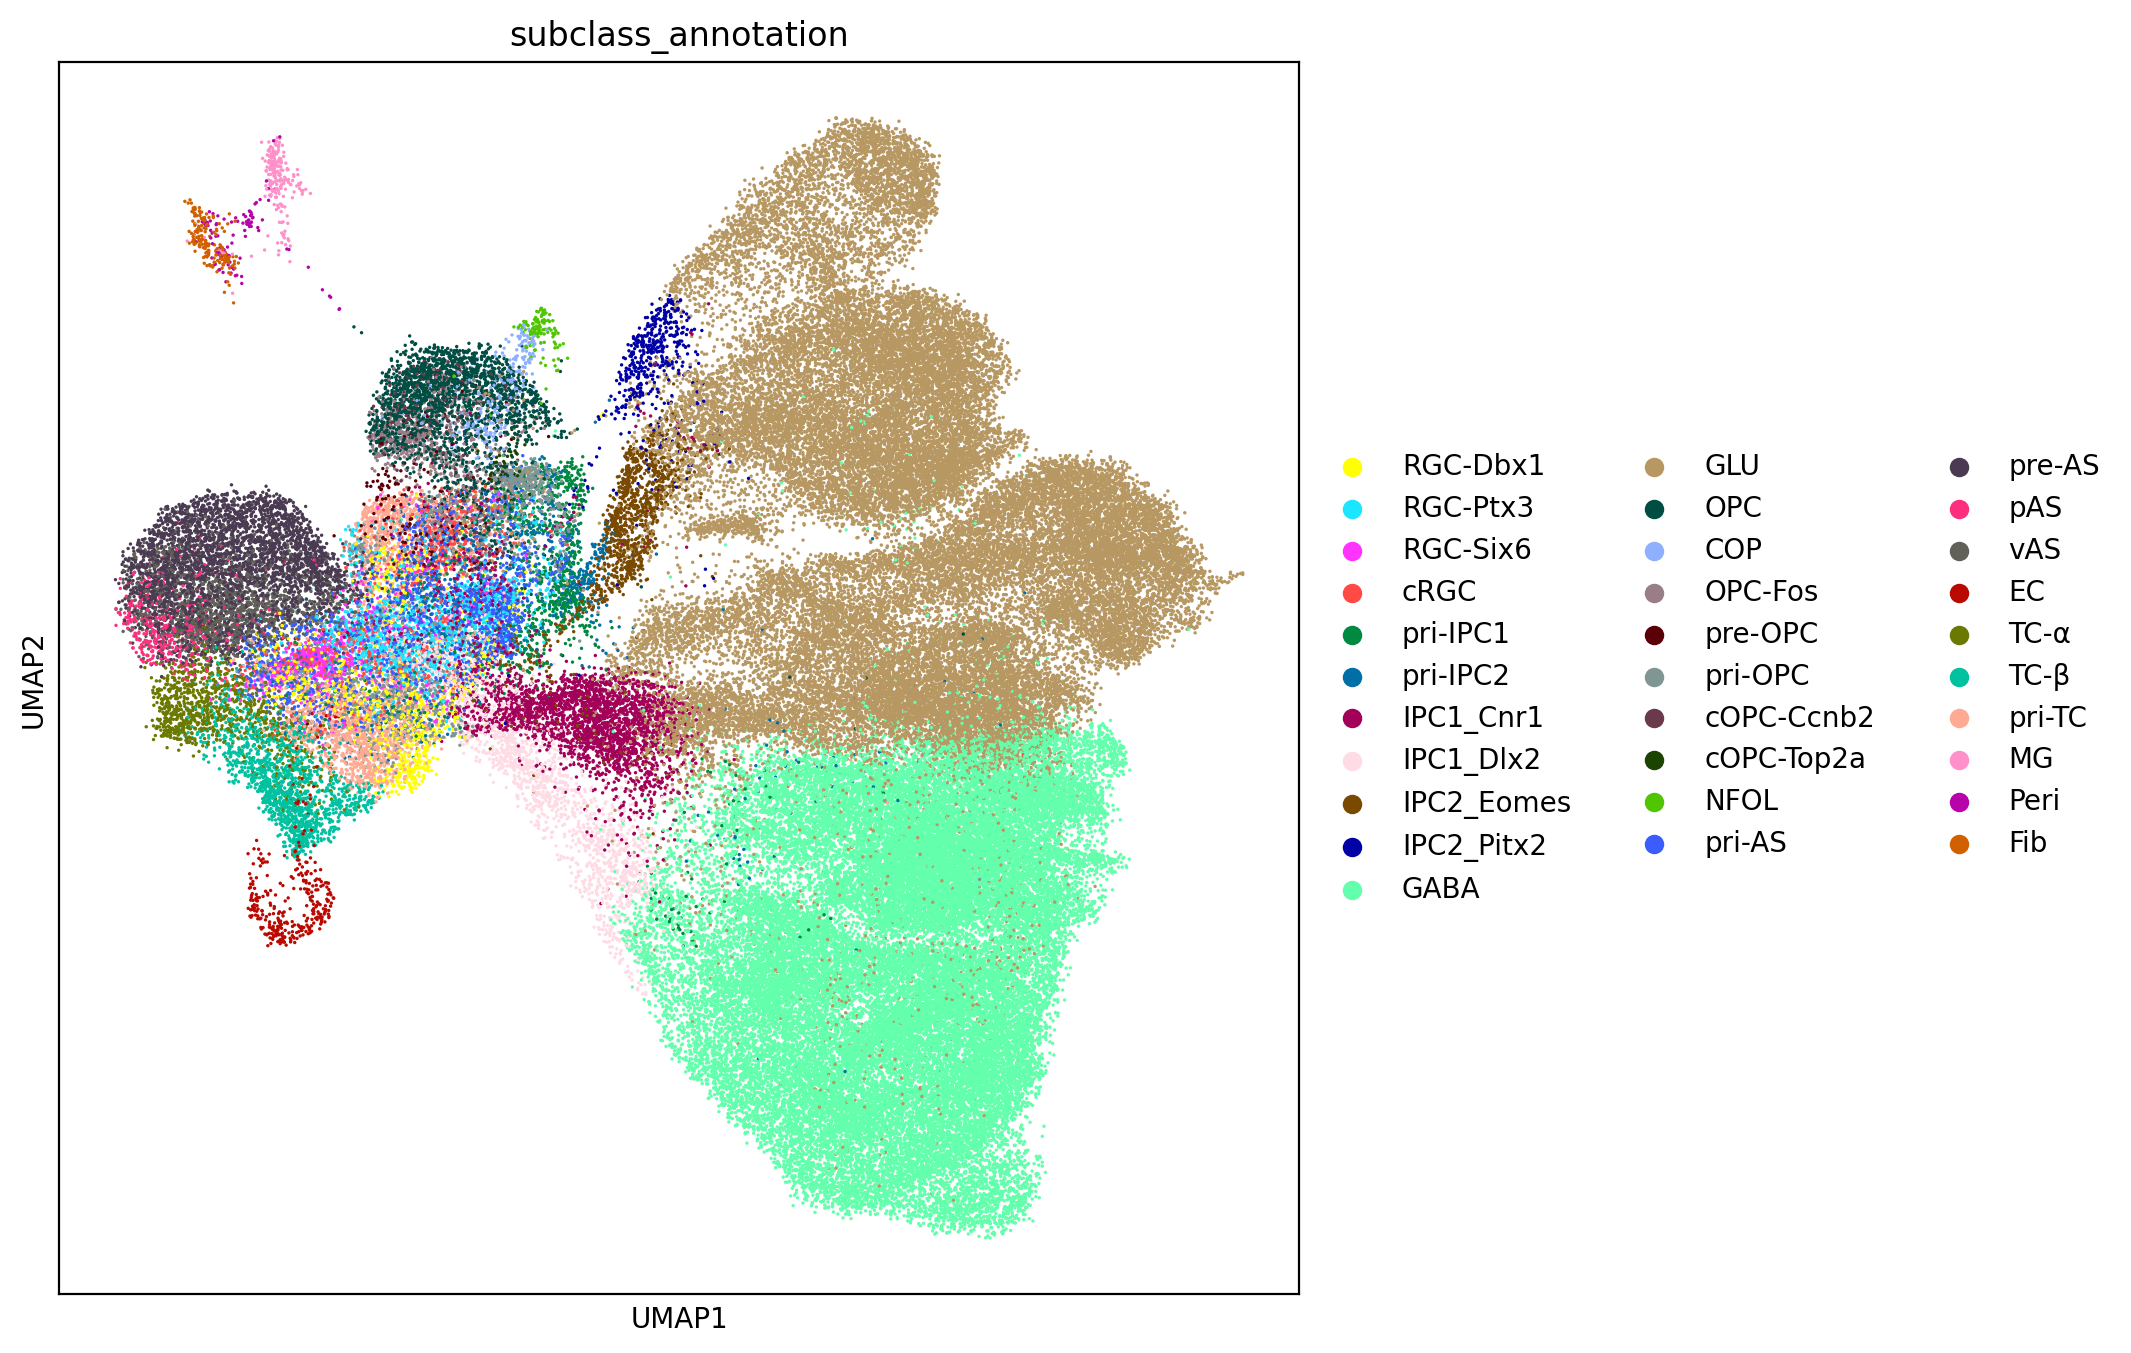

In [ ]:
# Set figure size (similar to R's options)
plt.rcParams['figure.figsize'] = (8, 8)  # width, height in inches
plt.rcParams['figure.dpi'] = 200       # resolution in dots per inch

# Visualize the new UMAP plot
sc.pl.umap(adata, color='subclass_annotation',size = 6)
plt.show() # Display the plot

In [ ]:
# Extract UMAP coordinates
umap_coords = pd.DataFrame(adata.obsm['X_umap'], index=adata.obs_names)

# Save to CSV
umap_coords.to_csv('paga_umap_coordinates.csv')